# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress


# Study data files.
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reads the Mouse metadata and the Study Results CSV files and saves them each as a DataFrame.
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combines the Mouse metadata and Study Results results into a single DataFrame.
# No benefit of using outer join for this dataset as only the Mice ID's in the Mouse Metadata are contained within the Study Results.
combined_mouse_results_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="right", sort=False)

# Displays the first five rows of the DataFrame which has been combined.
combined_mouse_results_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# The below outputs the number of individual mice observed in the study.
mouse_groups = combined_mouse_results_df.groupby("Mouse ID")
number_of_mice = len(mouse_groups["Mouse ID"])
print(f"A total of {number_of_mice} mice were observed in the Study")


A total of 249 mice were observed in the Study


In [3]:
# The data should be uniquely identified by Mouse ID and Timepoint.
# e.g. Mouse ID 'B128' should only have unique Timepoint values (0:50:5).

# Extracts the Mouse ID - Timepoints duplicated using loc.
duplicated_mice_timepoints = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"]), :]

# Shows an array of the duplicate mice ID numbers.
duplicated_mice_timepoints["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicated_mice_timepoints = combined_mouse_results_df.loc[combined_mouse_results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False), :]
all_duplicated_mice_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_mouse_results_df.loc[combined_mouse_results_df["Mouse ID"] != "g989", :]
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# The below outputs the number of individual mice observed in the study after removing duplicated Mouse ID - Timepoints.
mouse_groups = cleaned_df.groupby('Mouse ID')
number_of_mice = len(mouse_groups['Mouse ID'])
print(f"A total of {number_of_mice} mice are now considered in this study's analysis")

A total of 248 mice are now considered in this study's analysis


## Summary Statistics

In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

# Groups the data by Drug Regimen and stores the Tumor Volume (mm3) values as an object.
tumor_volumes_per_drug_regimen = cleaned_df.groupby('Drug Regimen')["Tumor Volume (mm3)"]

# Calculates each of the summary statistics for tumor volume based on each drug regimen. 
mean = tumor_volumes_per_drug_regimen.mean()
median = tumor_volumes_per_drug_regimen.median()
variance = tumor_volumes_per_drug_regimen.var()
standard_deviation = tumor_volumes_per_drug_regimen.std()
SEM = tumor_volumes_per_drug_regimen.sem()

# Compiles all of the summary statistics into a DataFrame. 
summary_statistics = pd.DataFrame({"Mean Tumor Volume":mean,
                                   "Median Tumor Volume":median,
                                   "Tumor Volume Variance": variance,
                                   "Tumor Volume Std.Dev.":standard_deviation,
                                   "Tumor Volume Std.Err":SEM})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Using the aggregation method, produces the same summary statistics in a single line:
cleaned_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

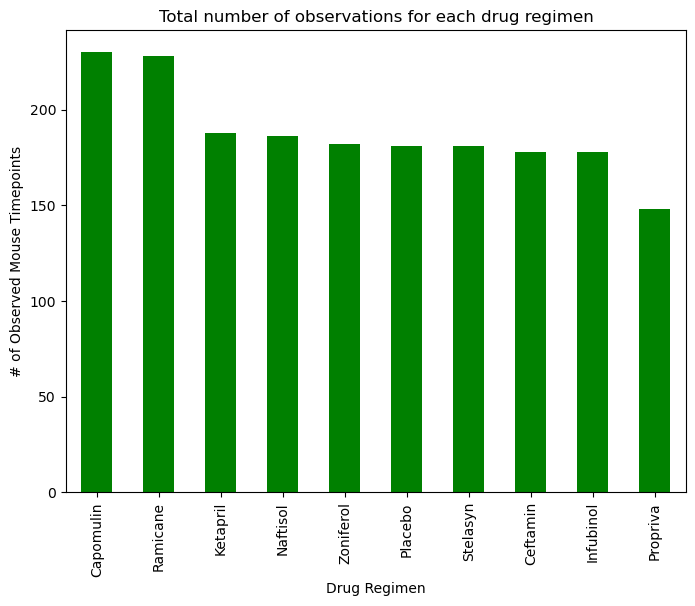

In [9]:
# Barchart Pandas
# Counts the number of Mouse ID's for each Drug Regimen and stores these values in a DataFrame. 
drug_regimen_observations = pd.DataFrame(cleaned_df.groupby("Drug Regimen")["Mouse ID"].count())

# Renames column in DataFrame.
drug_regimen_observations = drug_regimen_observations.rename(columns = {"Mouse ID": "No. of Observations"})

# Sorts observation values in descending order.
drug_regimen_observations = drug_regimen_observations.sort_values("No. of Observations", ascending=False)


# Bar plot showing the total number of rows (Mouse ID's) for each drug regimen using Pandas.

barchart = drug_regimen_observations.plot(kind='bar', legend=False, width=0.5, figsize=(8,6), ylabel="# of Observed Mouse Timepoints", title="Total number of observations for each drug regimen", color="green")

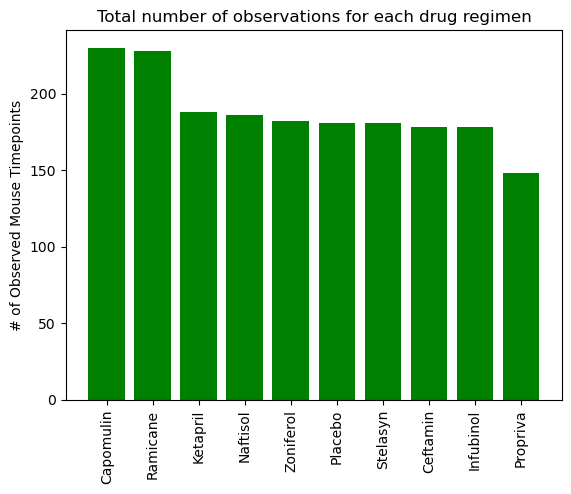

In [10]:
# Barchart pyplot

# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Resets the index of the DataFrame containing our data to plot. 
drug_regimen_observations = drug_regimen_observations.reset_index()

# Sets x axis values to be the number of drug regimens.
x_axis = np.arange(len(drug_regimen_observations))

# Sets y axis values to be the count of observations per drug regimen.
y_axis = drug_regimen_observations["No. of Observations"]

# Sets the position of the ticks to be [0:10:1]
tick_locations = [value for value in x_axis]

# Barchart showing the total number of rows (Mouse ID's) for each drug regimen using pyplot. 
barchart_pyplot = plt.bar(x_axis, y_axis, align="center", color="green")

# Sets each of the xticks to correspond with their Drug Regimen's.
plt.xticks(tick_locations, drug_regimen_observations["Drug Regimen"], rotation="vertical")

# Sets y label.
plt.ylabel("# of Observed Mouse Timepoints")

# Sets title
plt.title("Total number of observations for each drug regimen")

plt.show()

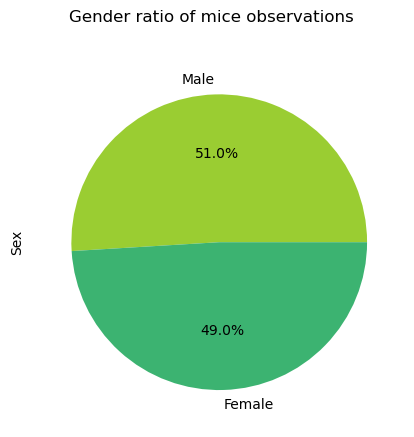

In [11]:
# Pie plot Pandas

# Gathers the number of male and female observations in the study and stores as a DataFrame. 
gender_ratio = pd.DataFrame(cleaned_df["Sex"].value_counts())

# Creates a pie plot showing the distribution of female versus male mice using Pandas.
piechart = gender_ratio.plot(kind="pie", subplots=True, legend=False, autopct="%1.1f%%", title="Gender ratio of mice observations", colors=["yellowgreen", "mediumseagreen"])

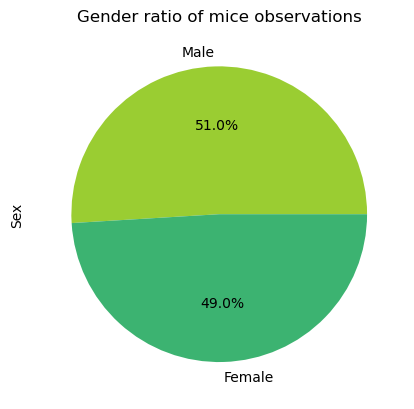

In [12]:
# Pie plot pyplot

# Gathers the number of male and female observations in the study and stores as a DataFrame. 
gender_ratio = pd.DataFrame(cleaned_df["Sex"].value_counts())


# Assigns the sizes, labels, and colors for the piechart. 
sizes = gender_ratio["Sex"]
labels = ["Male", "Female"]
colors = ["yellowgreen", "mediumseagreen"]

# Creates a pie plot showing the distribution of female versus male mice using Pandas.
piechart_pyplot = plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors)

# Sets title and ylabel.
plt.title("Gender ratio of mice observations")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Gets the greatest timepoint for each mouse and stores them within a new DataFrame. 
max_timepoints = pd.DataFrame(cleaned_df.groupby("Mouse ID")["Timepoint"].max())
max_timepoints = max_timepoints.reset_index()

# Merges the grouped max timepoints to the cleaned_df to get the tumor volume at the last timepoint of each mouse.
final_tumor_volumes = pd.merge(max_timepoints, cleaned_df,  how='left')

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [55]:
# List of treatments.
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data = []

# Loops through each of the treatments, finds all their mice's final tumor volumes and adds onto the final_tumor_volume_data list.
# Also calculates each treatment's IQR and upper/lower bounds to help inform on potential outliers.  

for treatment in treatments:
    
    # Locates the rows which contain the mice on the treatment and get their final tumor volumes.
    treatment_final_tumor_volumes = final_tumor_volumes.loc[final_tumor_volumes["Drug Regimen"]==treatment, "Tumor Volume (mm3)"]
    
    # Add the treatments final tumor volume to the list.  
    final_tumor_volume_data.append(treatment_final_tumor_volumes)
    
    # Determines outliers using the upper and lower bounds.
    quartiles = treatment_final_tumor_volumes.quantile([.25,.5,.75])
    
    Q1 = quartiles[.25]
    Q3 = quartiles[.75]
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    outliers = treatment_final_tumor_volumes.loc[(treatment_final_tumor_volumes < lower_bound) | (treatment_final_tumor_volumes > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

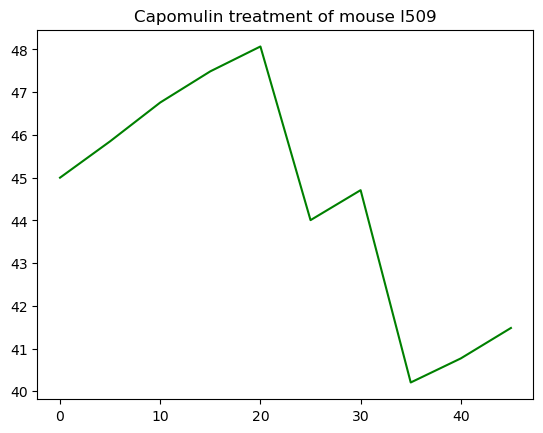

In [18]:
# Creates a new DataFrame only containing the Capomulin observations. 
Capomulin =  cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]

# Mouse ID to plot.
Mouse_ID = "l509"


# Locates all rows containing the chosen Mouse_ID from the Capomulin DataFrame. 
Mouse_timepoint_results = Capomulin.loc[Capomulin["Mouse ID"] == Mouse_ID, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Stores the series containing the chosen Mouse's Timepoint data in a Timepoints variable. 
Timepoints = Mouse_timepoint_results["Timepoint"]

# Stores the series containing the chosen Mouse's Tumor Volume data in a Tumor_Volume variable. 
Tumor_Volume = Mouse_timepoint_results["Tumor Volume (mm3)"]

# Generates a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
plt.plot(Timepoints, Tumor_Volume, color="green")

# Sets title. 
plt.title(f"Capomulin treatment of mouse {Mouse_ID}")

plt.show()

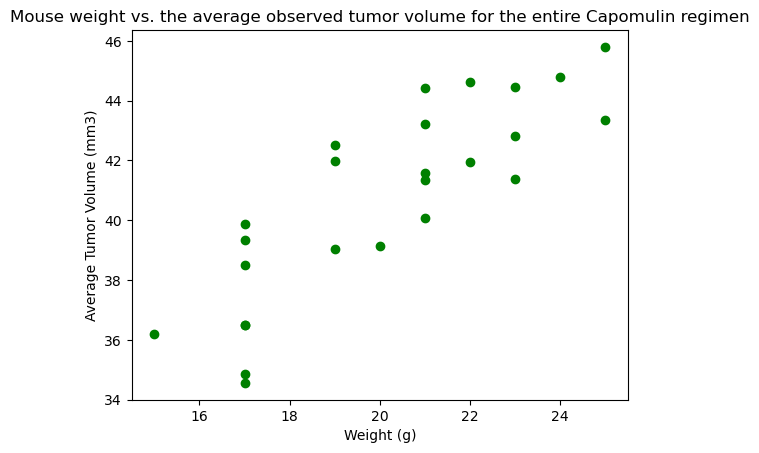

In [19]:
# Groups the Capomulin DataFrame by Mouse ID and outputs each of their average weight's and tumor volume's in a new DataFrame. 
average_capomulin_tumor = Capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Stores the series containing the weight data in a weight variable. 
weight = average_capomulin_tumor["Weight (g)"]

# Stores the series containing the average tumor volume data in a average_tumor_volume variable. 
average_tumor_volume = average_capomulin_tumor["Tumor Volume (mm3)"]

# Plots the scatter graph of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_plot = plt.scatter(weight, average_tumor_volume, color="green")

# Adds title and axis labels.
plt.title("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume for the entire Capomulin regimen is 0.84


NameError: name 'rvalue' is not defined

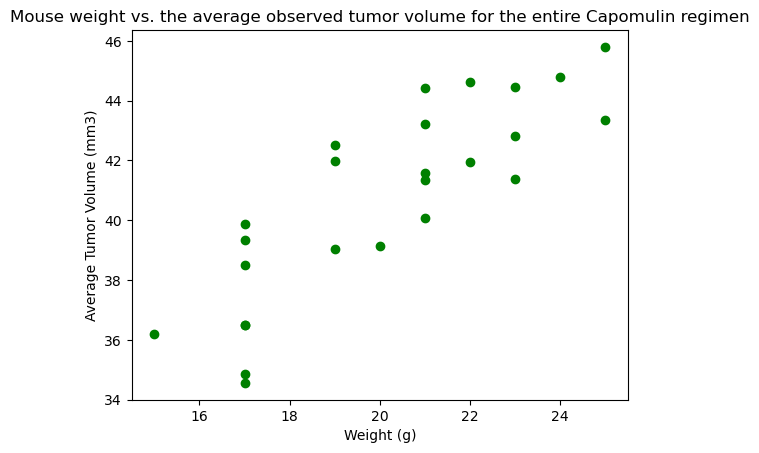

In [20]:
# Recreates the scatter plot from the previous code block...
# Groups the Capomulin DataFrame by Mouse ID and outputs each of their average weight's and tumor volume's in a new DataFrame. 
average_capomulin_tumor = Capomulin.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

# Stores the series containing the weight data in a weight variable. 
weight = average_capomulin_tumor["Weight (g)"]

# Stores the series containing the average tumor volume data in a average_tumor_volume variable. 
average_tumor_volume = average_capomulin_tumor["Tumor Volume (mm3)"]

# Plots the scatter graph of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.
scatter_plot = plt.scatter(weight, average_tumor_volume, color="green")

# Adds title and axis labels.
plt.title("Mouse weight vs. the average observed tumor volume for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# ---------------------------------------------------------------------------------------------------------------------

# Correlation and regression
# Prints the person correlation coefficient which describes the variability between the two factors.
print(f"The correlation between mouse weight and the average tumor volume for the entire Capomulin regimen is {round(st.pearsonr(weight, average_tumor_volume)[0],2)}")
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Linear model for weight versus average tumor volume for the entire Capomulin regimen.
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, average_tumor_volume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.plot(weight, regress_values, "r-")


plt.show()
